# Importing required Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
import pandas as pd
data=pd.read_csv('Final_Train.csv')
df=pd.DataFrame(data)
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [3]:
df.shape

(5961, 7)

In [4]:
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [5]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


# EDA Process

# Checking Null Values

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df.isnull()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,True,False,False,True,False
3,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
5956,False,False,False,False,False,False,False
5957,False,False,True,False,False,True,False
5958,False,False,False,False,False,False,False
5959,False,False,False,False,False,False,False


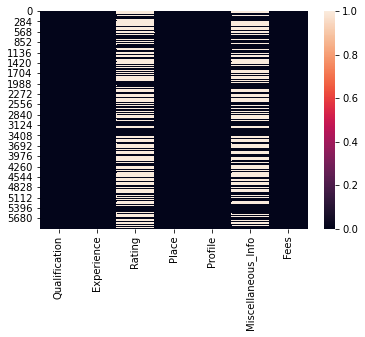

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

There are so much null values in Rating and Miscellaneous_Info column.

In [11]:
#Dropping Miscellaneous_Info column as the information given in the values are already present in other columns.
df.drop(['Miscellaneous_Info'],axis=1,inplace=True)   
df

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250
...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,100


In [12]:
#Filling Null Values
df['Rating'].fillna(value=df['Rating'].mode()[0],inplace=True)
df['Place'].fillna(value=df['Place'].mode()[0],inplace=True)
df

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,100%,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12 years experience,100%,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250
...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,300
5957,MBBS,33 years experience,100%,"Nungambakkam, Chennai",General Medicine,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,100


In [13]:
df.isnull().sum()

Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
Fees             0
dtype: int64

Now, There is no null values.

In [14]:
# Converting Experience into Numeric
for i in range(len(df)):
    df['Experience'][i]=df['Experience'][i][:-17]
    
df['Experience']=df['Experience'].astype(int)

In [15]:
# Converting Rating into Numeric
for i in range(len(df)):
    df['Rating'][i]=df['Rating'][i][:-1]
    
df['Rating']=df['Rating'].astype(int)

In [16]:
#Converting Rating into the range of 0-10 instead of 0-100.
df['Rating']=df['Rating']*0.1

In [17]:
df

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24,10.0,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12,9.8,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9,10.0,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12,10.0,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20,10.0,"Keelkattalai, Chennai",Ayurveda,250
...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,9.8,"Basavanagudi, Bangalore",ENT Specialist,300
5957,MBBS,33,10.0,"Nungambakkam, Chennai",General Medicine,100
5958,MBBS,41,9.7,"Greater Kailash Part 2, Delhi",General Medicine,600
5959,"MBBS, MD - General Medicine",15,9.0,"Vileparle West, Mumbai",General Medicine,100


In [18]:
df.dtypes

Qualification     object
Experience         int32
Rating           float64
Place             object
Profile           object
Fees               int64
dtype: object

In [19]:
#converting integer types from 32 bit to 64 bit
df['Experience']=np.int64(df['Experience'])
df.dtypes

Qualification     object
Experience         int64
Rating           float64
Place             object
Profile           object
Fees               int64
dtype: object

In [20]:
#Splitting Place Column to find the City
for i in range(len(df)):
    df['Place'][i]=df['Place'][i].split(",")[-1]
    
df

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24,10.0,Ernakulam,Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12,9.8,Bangalore,Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9,10.0,Bangalore,ENT Specialist,300
3,"BSc - Zoology, BAMS",12,10.0,Bangalore,Ayurveda,250
4,BAMS,20,10.0,Chennai,Ayurveda,250
...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,9.8,Bangalore,ENT Specialist,300
5957,MBBS,33,10.0,Chennai,General Medicine,100
5958,MBBS,41,9.7,Delhi,General Medicine,600
5959,"MBBS, MD - General Medicine",15,9.0,Mumbai,General Medicine,100


In [21]:
df.describe()

,Experience,Rating,Fees
count,5961.000000,5961.000000,5961.000000
mean,17.303976,9.761064,307.944640
std,11.142798,0.588154,190.920373
min,0.000000,0.700000,5.000000
25%,9.000000,9.800000,150.000000
50%,14.000000,10.000000,300.000000
75%,23.000000,10.000000,500.000000
max,66.000000,10.000000,950.000000


Observation:

There is not so much differences between mean and median of every columns.

Mostly Rating values are 100%.

There is high Standard Deviation in Fees.

In [22]:
df['Place'].value_counts()

 Bangalore             1283
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
e                         1
Name: Place, dtype: int64

Observation:

Most of the Doctors are from Bangalore, Mumbai and Delhi.

There is a city named e. It might be a spelling mistake. It need to be removed.

In [23]:
df=df[df['Place']!='e']
df['Place'].value_counts()

 Bangalore             1283
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
Name: Place, dtype: int64

In [24]:
df.shape

(5960, 6)

# Data Visualization

# Univariate Analysis

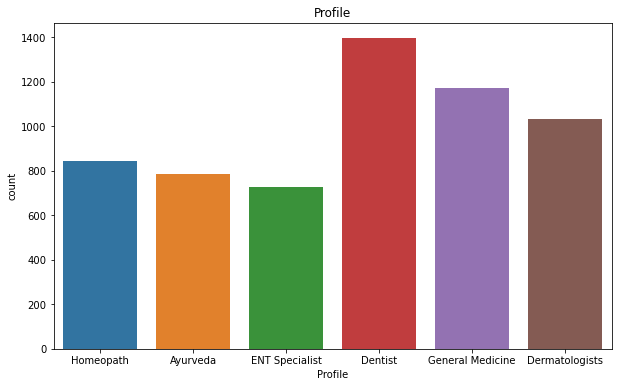

Dentist             1396
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64


In [25]:
plt.figure(figsize=(10,6))
sns.countplot(x='Profile',data=df)
plt.title('Profile')
plt.show()
print(df['Profile'].value_counts())

Observation:
    
Most of the doctors are Dentists.

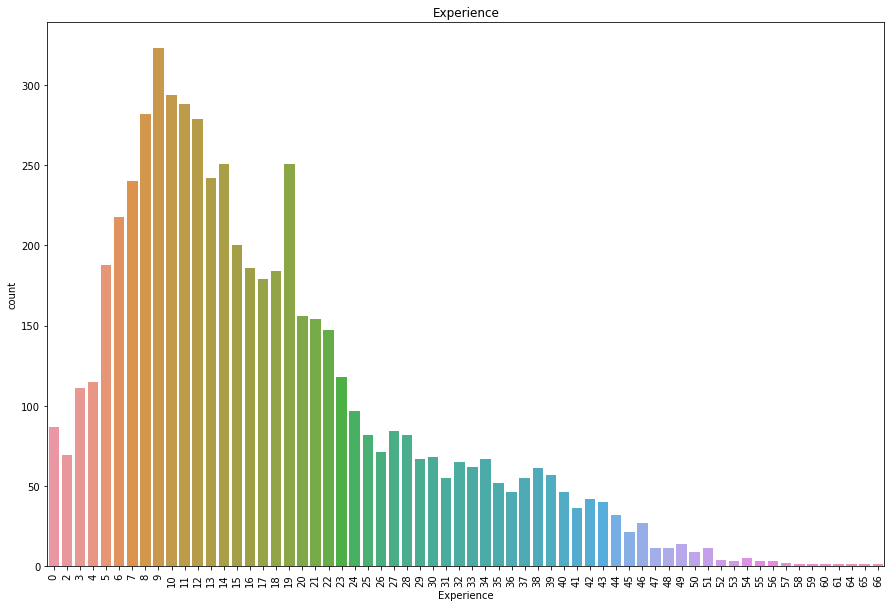

9     323
10    294
11    288
8     282
12    279
     ... 
64      1
65      1
58      1
66      1
61      1
Name: Experience, Length: 64, dtype: int64


In [26]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.countplot(x='Experience',data=df)
plt.title('Experience')
plt.show()
print(df['Experience'].value_counts())

Observation:

Maximum Doctors have experience 5-25 years of experience

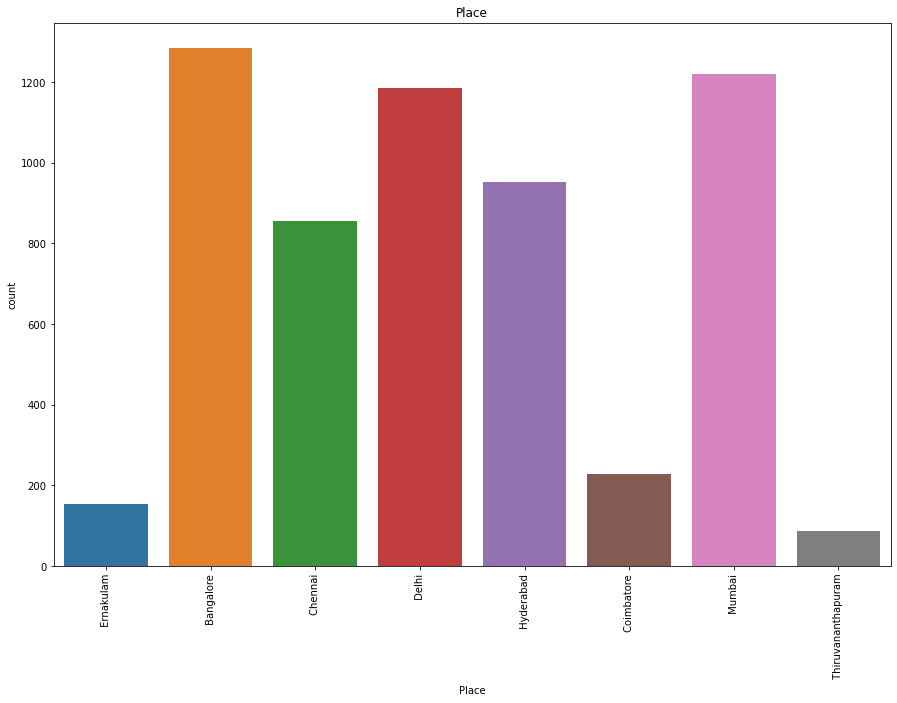

 Bangalore             1283
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
Name: Place, dtype: int64


In [27]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.countplot(x='Place',data=df)
plt.title('Place')
plt.show()
print(df['Place'].value_counts())

Observation:

Most of the Doctors are from Bangalore.

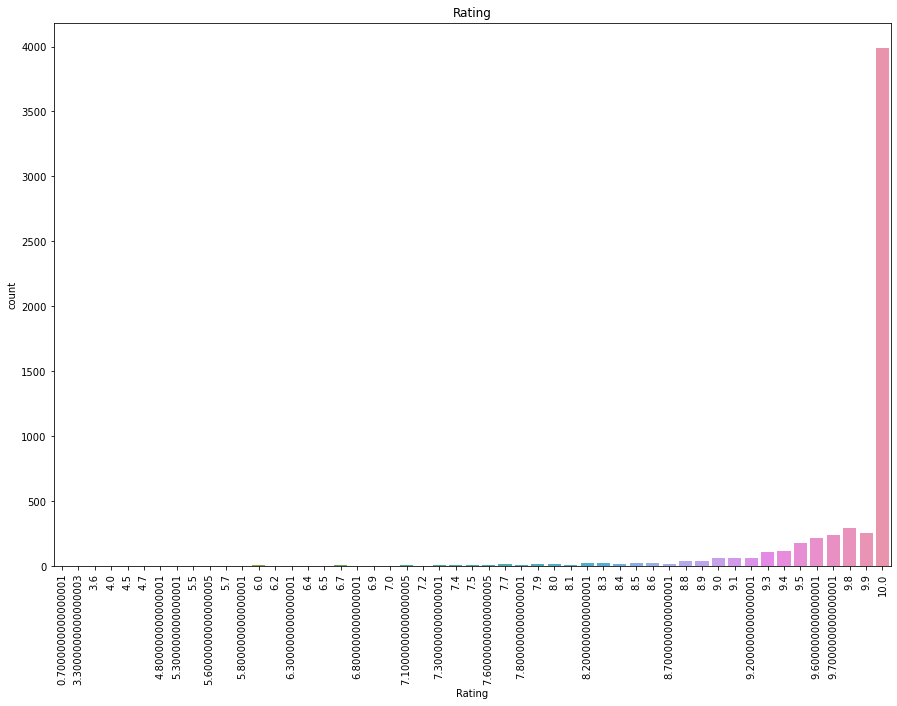

10.0    3985
9.8      290
9.9      259
9.7      241
9.6      220
9.5      178
9.4      115
9.3      109
9.0       66
9.2       66
9.1       60
8.9       42
8.8       41
8.5       27
8.2       23
8.6       21
8.3       21
8.0       19
7.7       16
8.7       14
8.4       13
7.9       13
6.7       12
8.1       12
7.6        9
7.1        9
7.5        8
7.3        8
6.0        7
7.4        7
7.8        6
5.6        5
6.8        5
6.9        4
7.0        4
5.7        3
7.2        3
3.3        2
5.5        2
6.4        2
6.3        2
6.2        2
4.7        1
0.7        1
4.8        1
4.0        1
4.5        1
5.8        1
3.6        1
5.3        1
6.5        1
Name: Rating, dtype: int64


In [28]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.countplot(x='Rating',data=df)
plt.title('Rating')
plt.show()
print(df['Rating'].value_counts())

Most of the Ratings given to the doctor is 100%. Means Best Doctors.

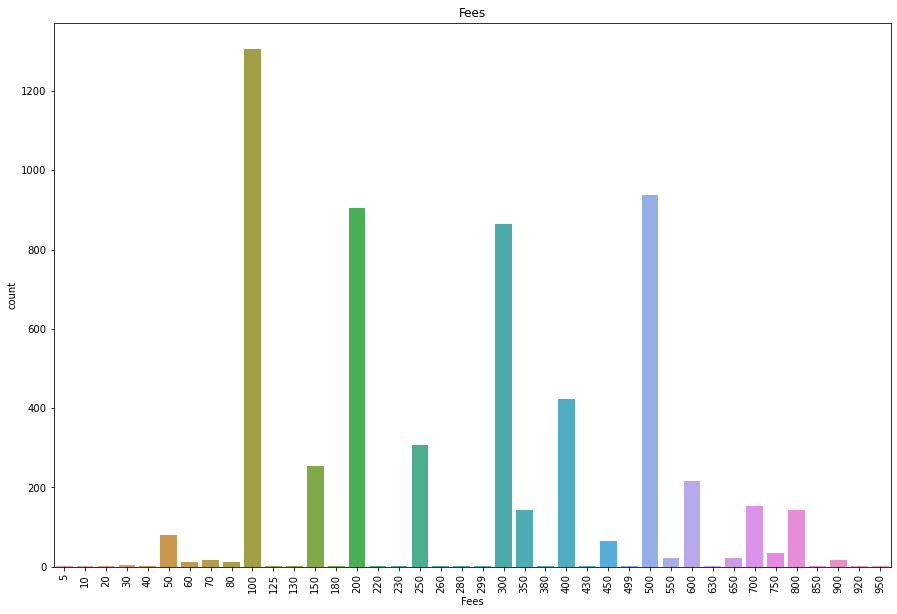

100    1306
500     938
200     904
300     864
400     424
250     306
150     253
600     215
700     153
800     143
350     143
50       81
450      65
750      34
550      22
650      21
900      18
70       18
80       12
60       11
30        4
10        2
260       2
130       2
180       2
40        2
380       2
220       1
280       1
499       1
5         1
920       1
299       1
125       1
230       1
430       1
630       1
850       1
950       1
20        1
Name: Fees, dtype: int64


In [29]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.countplot(x='Fees',data=df)
plt.title('Fees')
plt.show()
print(df['Fees'].value_counts())

Observation:

Most Doctors' Consulation Fees is 100 rupees.

# Bivariate Analysis

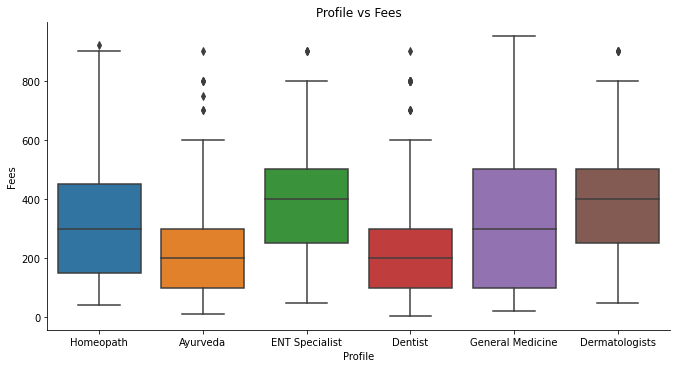

In [30]:
sns.catplot(x='Profile',y='Fees',data=df,kind='box',height=5,aspect=1.9)
plt.title('Profile vs Fees')
plt.show()

Observation:

ENT Specialists and Dermatologists Consulation Fees are higher.

Ayurveda and Dentists Consultation Fees are lower.

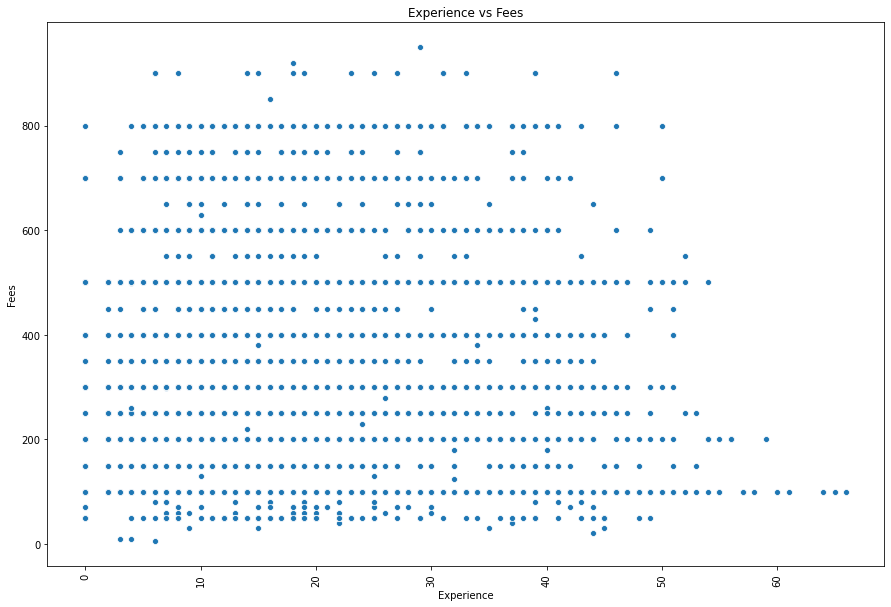

In [31]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.scatterplot(x=df['Experience'],y=df['Fees'],data=df)
plt.title('Experience vs Fees')
plt.show()

Observation:

It doesn't seem Experience is much related to Fees.

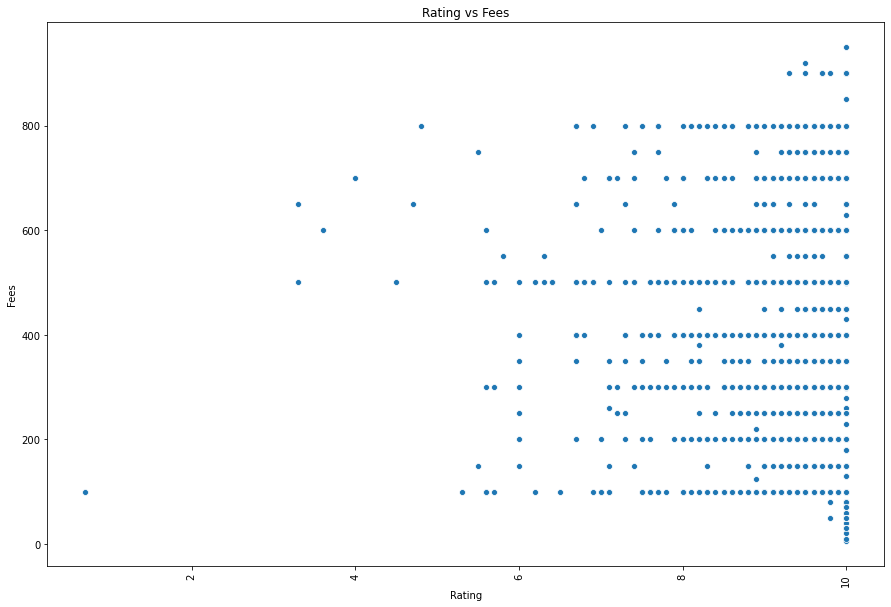

In [32]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.scatterplot(x=df['Rating'],y=df['Fees'],data=df)
plt.title('Rating vs Fees')
plt.show()

Observation:

As most of the Ratings lies between 90-100. So Most of the Fees are distributed in that region.

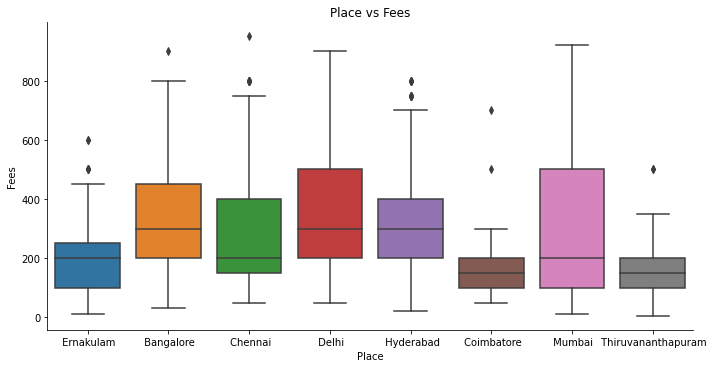

In [33]:
sns.catplot(x='Place',y='Fees',data=df,kind="box",height=5,aspect=2.0)
plt.title('Place vs Fees')
plt.show()

Observation:

The Fees are higher in Bangalore, Chennai and Hyderabad.

# Label Encoding

In [34]:
#Encoding Place and Profile Column into Numeric Values
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['Place','Profile']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [35]:
df

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24,10.0,4,5,100
1,"BAMS, MD - Ayurveda Medicine",12,9.8,0,0,350
2,"MBBS, MS - Otorhinolaryngology",9,10.0,0,3,300
3,"BSc - Zoology, BAMS",12,10.0,0,0,250
4,BAMS,20,10.0,1,0,250
...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,9.8,0,3,300
5957,MBBS,33,10.0,1,4,100
5958,MBBS,41,9.7,3,4,600
5959,"MBBS, MD - General Medicine",15,9.0,6,4,100


# Multivariate Analysis

# Correlation

In [36]:
df_corr=df.corr()
df_corr

,Experience,Rating,Place,Profile,Fees
Experience,1.000000,-0.149635,0.039062,0.202165,0.002143
Rating,-0.149635,1.000000,0.064414,-0.046958,-0.154696
Place,0.039062,0.064414,1.000000,-0.010916,-0.020266
Profile,0.202165,-0.046958,-0.010916,1.000000,0.145192
Fees,0.002143,-0.154696,-0.020266,0.145192,1.000000


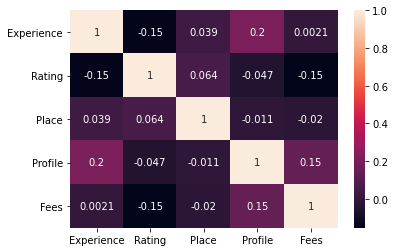

In [37]:
sns.heatmap(df_corr,annot=True)

Observation:

Profile is positively correlated with Fees whereas Rating is negatively correlated.

# Qualification Column Encoding

In [38]:
df['Qualification'].unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       'BDS, certification in smile designing',
       'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

Observation:

The Qualification column contains so much unique values and also there are a lot of degrees in one value and it is hard to ditinguish between one value.

So Let's Split each value of Qualification so that all unique degrees will be separated.

In [39]:
#Spliting the values of Qualification column.
df['Qualification']=df['Qualification'].str.split(",")
df['Qualification'].values

array([list(['BHMS', ' MD - Homeopathy']),
       list(['BAMS', ' MD - Ayurveda Medicine']),
       list(['MBBS', ' MS - Otorhinolaryngology']), ..., list(['MBBS']),
       list(['MBBS', ' MD - General Medicine']),
       list(['BDS', ' MDS - Orthodontics'])], dtype=object)

In [40]:
#Calculating the frequency of each value of Qualification in the dataset.
Qual={}

for x in df['Qualification'].values:
    for each in x:
        each=each.strip()
        if each in Qual:
            Qual[each]+=1
        else:
            Qual[each]=1
            
print(Qual)

{'BHMS': 749, 'MD - Homeopathy': 181, 'BAMS': 764, 'MD - Ayurveda Medicine': 139, 'MBBS': 2808, 'MS - Otorhinolaryngology': 103, 'BSc - Zoology': 3, 'BDS': 1362, 'MD - General Medicine': 285, 'BSc': 3, 'MS': 2, 'DNB - ENT': 111, 'MDS': 82, 'MDS - Oral & Maxillofacial Surgery': 104, 'Diploma in Otorhinolaryngology (DLO)': 250, 'MF- Homeopathy': 5, 'MS - ENT': 411, 'DNB': 58, 'Fellowship of College of General Practice (FCGP)': 13, 'DDVL': 161, 'IBCLC (USA)': 1, 'Post Graduate Diploma in Diabetology (PGDD)': 53, 'Diploma in Dermatology': 67, 'Fellowship in Aesthetic Medicine': 23, 'DM - Neurology': 6, 'MD - Pediatrics': 13, 'Fellowship in Cleft Lip and Craniofacial Surgery': 1, 'Diploma in Cosmetology': 3, 'AFIH': 4, 'MDS - Prosthodontist And Crown Bridge': 45, 'M. D. Hom. (Practice of Medicine)': 2, 'Diploma in Emergency Medicine': 8, 'Diploma in Counselling Skills': 2, 'DHMS (Diploma in Homeopathic Medicine and Surgery)': 47, 'MD - Dermatology': 606, 'Venereology & Leprosy': 297, 'MDS -

In [41]:
#Finding the top 10 most degrees used in the Qualification column.
most_qual=sorted(Qual.items(),key=lambda x:x[1],reverse=True)[:10]
most_qual

[('MBBS', 2808),
 ('BDS', 1362),
 ('BAMS', 764),
 ('BHMS', 749),
 ('MD - Dermatology', 606),
 ('MS - ENT', 411),
 ('Venereology & Leprosy', 297),
 ('MD - General Medicine', 285),
 ('Diploma in Otorhinolaryngology (DLO)', 250),
 ('MD - Homeopathy', 181)]

In [42]:
#Listing the top 10 degrees
final_qual=[]
for q in most_qual:
    final_qual.append(q[0])

print(final_qual)

['MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy', 'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy']


In [43]:
#Creating dummies of binary columns for those 10 top degrees
for q in final_qual:
    df[q]=0
    
for x,y in zip(df['Qualification'].values,np.array([i for i in range(len(df))])):
    for c in x:
        c=c.strip()
        if c in final_qual:
            df[c][y]=1

In [44]:
df

,Qualification,Experience,Rating,Place,Profile,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,"[BHMS, MD - Homeopathy]",24,10.0,4,5,100,0,0,0,1,0,0,0,0,0,1
1,"[BAMS, MD - Ayurveda Medicine]",12,9.8,0,0,350,0,0,1,0,0,0,0,0,0,0
2,"[MBBS, MS - Otorhinolaryngology]",9,10.0,0,3,300,1,0,0,0,0,0,0,0,0,0
3,"[BSc - Zoology, BAMS]",12,10.0,0,0,250,0,0,1,0,0,0,0,0,0,0
4,[BAMS],20,10.0,1,0,250,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,"[MBBS, MS - ENT]",19,9.8,0,3,300,1,0,0,0,0,0,0,0,0,0
5957,[MBBS],33,10.0,1,4,100,1,0,0,0,0,0,0,0,0,0
5958,[MBBS],41,9.7,3,4,600,1,0,0,0,0,0,0,1,0,0
5959,"[MBBS, MD - General Medicine]",15,9.0,6,4,100,0,1,0,0,0,0,0,0,0,0


In [45]:
#No Need of Qualification Column now
df.drop(['Qualification'],axis=1,inplace=True)
df

,Experience,Rating,Place,Profile,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10.0,4,5,100,0,0,0,1,0,0,0,0,0,1
1,12,9.8,0,0,350,0,0,1,0,0,0,0,0,0,0
2,9,10.0,0,3,300,1,0,0,0,0,0,0,0,0,0
3,12,10.0,0,0,250,0,0,1,0,0,0,0,0,0,0
4,20,10.0,1,0,250,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,9.8,0,3,300,1,0,0,0,0,0,0,0,0,0
5957,33,10.0,1,4,100,1,0,0,0,0,0,0,0,0,0
5958,41,9.7,3,4,600,1,0,0,0,0,0,0,1,0,0
5959,15,9.0,6,4,100,0,1,0,0,0,0,0,0,0,0


# Outliers and Skewness is no need to be entertained because most of the columns are categorical and all the datas are very very important.

# Preparing Input Variable

In [46]:
x=df.drop(['Fees'],axis=1)
x

,Experience,Rating,Place,Profile,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10.0,4,5,0,0,0,1,0,0,0,0,0,1
1,12,9.8,0,0,0,0,1,0,0,0,0,0,0,0
2,9,10.0,0,3,1,0,0,0,0,0,0,0,0,0
3,12,10.0,0,0,0,0,1,0,0,0,0,0,0,0
4,20,10.0,1,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,9.8,0,3,1,0,0,0,0,0,0,0,0,0
5957,33,10.0,1,4,1,0,0,0,0,0,0,0,0,0
5958,41,9.7,3,4,1,0,0,0,0,0,0,1,0,0
5959,15,9.0,6,4,0,1,0,0,0,0,0,0,0,0


# Preparing Target Variable

In [47]:
y=pd.DataFrame(df['Fees'])
y

,Fees
0,100
1,350
2,300
3,250
4,250
...,...
5956,300
5957,100
5958,600
5959,100


# Target Variables are continous values. So the model will be a regression type.

# Finding Best Random State

In [48]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
best_r_state=0
accu=0

for i in range(30,200):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.30,random_state=i)
    mod=LinearRegression()
    mod.fit(train_x,train_y)
    pred_y=mod.predict(test_x)
    tempaccu=r2_score(test_y,pred_y)
    if tempaccu>accu:
        accu=tempaccu
        best_r_state=i

print(f"Best random_state {best_r_state}")

Best random_state 108


# Multiple Algorithms

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.30,random_state=108)
model=[LinearRegression(),KNeighborsRegressor(),SVR(),RandomForestRegressor(),AdaBoostRegressor(),
       GradientBoostingRegressor(),Lasso(),Ridge(),ElasticNet()]

for m in model:
    m.fit(train_x,train_y)
    m_y=m.predict(test_x)
    print("Score of Model",m,"is",m.score(train_x,train_y))
    print("\nError")
    print("Mean Absolute Error", mean_absolute_error(test_y,m_y))
    print("Root Mean Squared Error", (mean_squared_error(test_y,m_y))**0.5 )
    print("*******************************************************************")
    print("\n\n")

Score of Model LinearRegression() is 0.06915210078496137

Error
Mean Absolute Error 148.51257433735753
Root Mean Squared Error 182.98634905344048
*******************************************************************



Score of Model KNeighborsRegressor() is 0.3275145983099328

Error
Mean Absolute Error 149.23870246085013
Root Mean Squared Error 191.1207484606787
*******************************************************************



Score of Model SVR() is 0.001233191778788556

Error
Mean Absolute Error 154.2624094246529
Root Mean Squared Error 193.89992780686066
*******************************************************************



Score of Model RandomForestRegressor() is 0.7312223744820624

Error
Mean Absolute Error 145.43921733483302
Root Mean Squared Error 190.08887446893408
*******************************************************************



Score of Model AdaBoostRegressor() is 0.10000815982527578

Error
Mean Absolute Error 150.17120429811655
Root Mean Squared Error 181.46074011

RandomForestRegressor() has the highest Accuracy of 73.86%

# Hypertuning RandomForestRegressor Model using GridSearchCV

In [50]:
from sklearn.model_selection import GridSearchCV
rfr=RandomForestRegressor()
parameters={'n_estimators':[100,200,300,400,500]}
reg=GridSearchCV(rfr,parameters)
reg.fit(x,y)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [100, 200, 300, 400, 500]})

In [51]:
print(reg.best_params_)

{'n_estimators': 500}


In [52]:
rfr=RandomForestRegressor(n_estimators=500) #parameters given from GridSearchCV method.
rfr.fit(train_x,train_y)
rfr.score(train_x,train_y)
rfr_y=rfr.predict(test_x)
print("Score of Model is",rfr.score(train_x,train_y))
print("Mean Absolute Error", mean_absolute_error(test_y,rfr_y))
print("Root Mean Squared Error", (mean_squared_error(test_y,rfr_y))**0.5 )

Score of Model is 0.7338940965139408
Mean Absolute Error 145.30534180243527
Root Mean Squared Error 189.7614004253184


After Hypertuning the Model Score improved to 74.07% from 73.86%.

# Conclusion

The best Accuracy is at RandomForestRegressor having 74.07%.

# Loading Test Data

In [53]:
test_data=pd.read_csv('Final_Test.csv')
df_test=pd.DataFrame(test_data)
df_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


# EDA of Test Data

In [54]:
#Checking Null Values
df_test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

Observation:
    
There are so much null values in Rating and Miscellaneous_Info.

In [55]:
df_test.shape

(1987, 6)

In [56]:
#Dropping Miscellaneous_Info column as the information given in the values are already present in other columns.
df_test.drop(['Miscellaneous_Info'],axis=1,inplace=True)   
df_test

,Qualification,Experience,Rating,Place,Profile
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist
...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist


In [57]:
#Filling Null Values
df_test['Rating'].fillna(value=df_test['Rating'].mode()[0],inplace=True)
df_test['Place'].fillna(value=df_test['Place'].mode()[0],inplace=True)
df_test

,Qualification,Experience,Rating,Place,Profile
0,MBBS,35 years experience,100%,"Ghatkopar East, Mumbai",General Medicine
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,100%,"West Marredpally, Hyderabad",ENT Specialist
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists
3,BAMS,0 years experience,100%,"New Ashok Nagar, Delhi",Ayurveda
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist
...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,100%,"Basavanagudi, Bangalore",Ayurveda
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,100%,"Choolai, Chennai",Dermatologists
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,100%,"Porur, Chennai",General Medicine
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist


In [58]:
df_test.isnull().sum()

Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
dtype: int64

Observation:

Now, there is no null values in test data.

In [59]:
# Converting Experience into Numeric
for i in range(len(df_test)):
    df_test['Experience'][i]=df_test['Experience'][i][:-17]
    
df_test['Experience']=df_test['Experience'].astype(int)

In [60]:
# Converting Rating into Numeric
for i in range(len(df_test)):
    df_test['Rating'][i]=df_test['Rating'][i][:-1]
    
df_test['Rating']=df_test['Rating'].astype(int)

In [61]:
#Converting Rating into the range of 0-10 instead of 0-100.
df_test['Rating']=df_test['Rating']*0.1
df_test

,Qualification,Experience,Rating,Place,Profile
0,MBBS,35,10.0,"Ghatkopar East, Mumbai",General Medicine
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,10.0,"West Marredpally, Hyderabad",ENT Specialist
2,"MBBS, DDVL",40,7.0,"KK Nagar, Chennai",Dermatologists
3,BAMS,0,10.0,"New Ashok Nagar, Delhi",Ayurveda
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,10.0,"Kanakpura Road, Bangalore",Dentist
...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10,10.0,"Basavanagudi, Bangalore",Ayurveda
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4,10.0,"Choolai, Chennai",Dermatologists
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,10.0,"Porur, Chennai",General Medicine
1985,BDS,12,9.8,"Arekere, Bangalore",Dentist


In [62]:
df_test.dtypes

Qualification     object
Experience         int32
Rating           float64
Place             object
Profile           object
dtype: object

In [63]:
#converting integer types from 32 bit to 64 bit
df_test['Experience']=np.int64(df_test['Experience'])
df_test.dtypes

Qualification     object
Experience         int64
Rating           float64
Place             object
Profile           object
dtype: object

In [64]:
#Splitting Place Column to find the City
for i in range(len(df_test)):
    df_test['Place'][i]=df_test['Place'][i].split(",")[-1]
    
df_test

,Qualification,Experience,Rating,Place,Profile
0,MBBS,35,10.0,Mumbai,General Medicine
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,10.0,Hyderabad,ENT Specialist
2,"MBBS, DDVL",40,7.0,Chennai,Dermatologists
3,BAMS,0,10.0,Delhi,Ayurveda
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,10.0,Bangalore,Dentist
...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10,10.0,Bangalore,Ayurveda
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4,10.0,Chennai,Dermatologists
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,10.0,Chennai,General Medicine
1985,BDS,12,9.8,Bangalore,Dentist


In [65]:
df_test['Place'].value_counts()

 Bangalore             420
 Delhi                 417
 Mumbai                395
 Hyderabad             333
 Chennai               287
 Coimbatore             70
 Ernakulam              48
 Thiruvananthapuram     17
Name: Place, dtype: int64

Observation:

Test Data has highest number of Bangalore datas.

In [66]:
df_test['Profile'].value_counts()

General Medicine    444
Dentist             441
Dermatologists      339
Homeopath           277
Ayurveda            251
ENT Specialist      235
Name: Profile, dtype: int64

Observation:

Most of the Doctors' profile is General Medicine and Dentist

In [67]:
df_test['Experience'].unique()

array([35, 31, 40,  0, 16, 14, 23,  9, 11, 44,  4, 34, 13, 28,  6, 32,  3,
        8, 43, 27, 22, 25, 36, 17, 20, 18, 29,  5, 19, 10,  2, 30, 24, 26,
       41, 46, 21, 12, 45, 33, 38,  7, 59, 15, 39, 42, 54, 49, 48, 52, 51,
       50, 37, 47, 53, 56, 65], dtype=int64)

Observation:

There is no unusal Data.

In [68]:
df_test['Rating'].unique()

array([10. ,  7. ,  9. ,  9.4,  9.9,  9.8,  8.7,  6.4,  9.6,  9.5,  9.7,
        9.3,  6.9,  7.1,  8.3,  9.2,  8. ,  8.6,  8.8,  6.7,  8.5,  8.4,
        5.5,  8.9,  8.2,  8.1,  6. ,  7.3,  6.5,  7.7,  9.1,  7.8,  7.9,
        7.6,  5.2,  5.3])

Observation:

There is no unusal Data.

# Label Encoding of Test Data

In [69]:
#Encoding Place and Profile Column into Numeric Values
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['Place','Profile']
for val in list1:
    df_test[val]=le.fit_transform(df_test[val].astype(str))

In [70]:
df_test

,Qualification,Experience,Rating,Place,Profile
0,MBBS,35,10.0,6,4
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,10.0,5,3
2,"MBBS, DDVL",40,7.0,1,2
3,BAMS,0,10.0,3,0
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,10.0,0,1
...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10,10.0,0,0
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4,10.0,1,2
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,10.0,1,4
1985,BDS,12,9.8,0,1


# Qualification Column Encoding of Test Data

Doing same operations for Qualification column as done in Train Data

In [71]:
df_test['Qualification'].unique()

array(['MBBS', 'MBBS, Diploma in Otorhinolaryngology (DLO)', 'MBBS, DDVL',
       'BAMS', 'BDS, MDS - Conservative Dentistry & Endodontics',
       'BDS, MDS', 'BDS, MDS - Pedodontics',
       'MD - Ayurveda Medicine, BAMS, Yoga Teachers Training Course, M. D. IN KAYACHIKISTA',
       'BHMS', 'BDS', 'MBBS, FCD - Diabetology', 'MBBS, DDV',
       'MBBS, MD - Dermatology', 'MS - ENT',
       'MBBS, Diploma in Otorhinolaryngology (DLO), MS - ENT, DNB - ENT, MNAMS (Membership of the National Academy)',
       'BHMS, Diploma in Naturopathy & Yogic Science (DNYS), Diploma in Diet and Nutrition, Diploma in Cosmetology',
       'MBBS, PG Diploma In Clinical Cosmetology (PGDCC)',
       'BDS, MDS - Periodontics', 'BDS, MDS- Oral Pathology',
       'MBBS, MD - General Medicine', 'MS - ENT, MBBS',
       'MBBS, Diploma in Otorhinolaryngology (DLO), DNB - ENT',
       'MBBS, MS - ENT, DNB - Otorhinolaryngology',
       'BDS, PhD - Endodontics, MDS - Conservative Dentistry & Endodontics',
       'B

In [72]:
#Spliting the values of Qualification column.
df_test['Qualification']=df_test['Qualification'].str.split(",")
df_test['Qualification'].values

array([list(['MBBS']),
       list(['MBBS', ' Diploma in Otorhinolaryngology (DLO)']),
       list(['MBBS', ' DDVL']), ...,
       list(['MBBS', ' MD / MS - Obstetrics & Gynaecology']),
       list(['BDS']),
       list(['MBBS', ' MD - Dermatology ', ' Venereology & Leprosy'])],
      dtype=object)

In [73]:
#Calculating the frequency of each value of Qualification in the dataset.
Qual_test={}

for y in df_test['Qualification'].values:
    for each_t in y:
        each_t=each_t.strip()
        if each_t in Qual_test:
            Qual_test[each_t]+=1
        else:
            Qual_test[each_t]=1
            
print(Qual_test)

{'MBBS': 980, 'Diploma in Otorhinolaryngology (DLO)': 85, 'DDVL': 67, 'BAMS': 243, 'BDS': 428, 'MDS - Conservative Dentistry & Endodontics': 34, 'MDS': 21, 'MDS - Pedodontics': 10, 'MD - Ayurveda Medicine': 41, 'Yoga Teachers Training Course': 2, 'M. D. IN KAYACHIKISTA': 2, 'BHMS': 249, 'FCD - Diabetology': 2, 'DDV': 38, 'MD - Dermatology': 196, 'MS - ENT': 128, 'DNB - ENT': 39, 'MNAMS (Membership of the National Academy)': 3, 'Diploma in Naturopathy & Yogic Science (DNYS)': 1, 'Diploma in Diet and Nutrition': 4, 'Diploma in Cosmetology': 5, 'PG Diploma In Clinical Cosmetology (PGDCC)': 4, 'MDS - Periodontics': 13, 'MDS- Oral Pathology': 1, 'MD - General Medicine': 99, 'DNB - Otorhinolaryngology': 15, 'PhD - Endodontics': 1, 'BSc': 3, 'LCEH': 6, 'DGO': 4, 'MD - Obstetrics & Gynaecology': 5, 'MD - Homeopathy': 62, 'DM - Oncology': 1, 'DNB - Dermatology': 5, 'Venereology & Leprosy': 91, 'DVD': 11, 'MS - Otorhinolaryngology': 42, 'Fellowship in Aesthetic Medicine': 5, 'Fellowship in Oral 

In [74]:
#Finding the top 10 most degrees used in the Qualification column.
most_qual_test=sorted(Qual_test.items(),key=lambda x:x[1],reverse=True)[:10]
most_qual_test

[('MBBS', 980),
 ('BDS', 428),
 ('BHMS', 249),
 ('BAMS', 243),
 ('MD - Dermatology', 196),
 ('MS - ENT', 128),
 ('MD - General Medicine', 99),
 ('Venereology & Leprosy', 91),
 ('Diploma in Otorhinolaryngology (DLO)', 85),
 ('DDVL', 67)]

In [75]:
#Listing the top 10 degrees
final_qual_test=[]
for qt in most_qual_test:
    final_qual_test.append(qt[0])

print(final_qual_test)

['MBBS', 'BDS', 'BHMS', 'BAMS', 'MD - Dermatology', 'MS - ENT', 'MD - General Medicine', 'Venereology & Leprosy', 'Diploma in Otorhinolaryngology (DLO)', 'DDVL']


In [76]:
#Creating dummies of binary columns for those 10 top degrees
for qft in final_qual_test:
    df_test[qft]=0
    
for x,y in zip(df_test['Qualification'].values,np.array([i for i in range(len(df_test))])):
    for c in x:
        c=c.strip()
        if c in final_qual_test:
            df_test[c][y]=1

In [77]:
df_test

,Qualification,Experience,Rating,Place,Profile,MBBS,BDS,BHMS,BAMS,MD - Dermatology,MS - ENT,MD - General Medicine,Venereology & Leprosy,Diploma in Otorhinolaryngology (DLO),DDVL
0,[MBBS],35,10.0,6,4,1,0,0,0,0,0,0,0,0,0
1,"[MBBS, Diploma in Otorhinolaryngology (DLO)]",31,10.0,5,3,1,0,0,0,0,0,0,0,1,0
2,"[MBBS, DDVL]",40,7.0,1,2,1,0,0,0,0,0,0,0,0,1
3,[BAMS],0,10.0,3,0,0,0,0,1,0,0,0,0,0,0
4,"[BDS, MDS - Conservative Dentistry & Endodont...",16,10.0,0,1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,"[BAMS, Doctor of Medicine]",10,10.0,0,0,0,0,0,1,0,0,0,0,0,0
1983,"[MD - Dermatology , Venereology & Leprosy, M...",4,10.0,1,2,1,0,0,0,1,0,0,1,0,0
1984,"[MBBS, MD / MS - Obstetrics & Gynaecology]",9,10.0,1,4,1,0,0,0,0,0,0,0,0,0
1985,[BDS],12,9.8,0,1,0,1,0,0,0,0,0,0,0,0


In [78]:
#No Need of Qualification Column now
df_test.drop(['Qualification'],axis=1,inplace=True)
df_test

,Experience,Rating,Place,Profile,MBBS,BDS,BHMS,BAMS,MD - Dermatology,MS - ENT,MD - General Medicine,Venereology & Leprosy,Diploma in Otorhinolaryngology (DLO),DDVL
0,35,10.0,6,4,1,0,0,0,0,0,0,0,0,0
1,31,10.0,5,3,1,0,0,0,0,0,0,0,1,0
2,40,7.0,1,2,1,0,0,0,0,0,0,0,0,1
3,0,10.0,3,0,0,0,0,1,0,0,0,0,0,0
4,16,10.0,0,1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,10,10.0,0,0,0,0,0,1,0,0,0,0,0,0
1983,4,10.0,1,2,1,0,0,0,1,0,0,1,0,0
1984,9,10.0,1,4,1,0,0,0,0,0,0,0,0,0
1985,12,9.8,0,1,0,1,0,0,0,0,0,0,0,0


# Prediction using best model RandomForestRegressor.

In [79]:
#rfr is the object for RandomForestRegressor
rfr_pred=rfr.predict(df_test)
rfr_pred

array([196.8797619 , 298.72333333, 337.5       , ..., 199.585     ,
       181.58130952, 582.8952381 ])

In [80]:
rfr_pred=pd.DataFrame(rfr_pred, columns=['Fees'])
rfr_pred

,Fees
0,196.879762
1,298.723333
2,337.500000
3,203.141667
4,449.941667
...,...
1982,287.086746
1983,523.815595
1984,199.585000
1985,181.581310


# Saving Predicted Values into a CSV File

In [86]:
rfr_pred.to_csv(r"C:\Users\yyogi\doctor dataset\Final Participant Data Folder\rfr_pred.csv")

# Saving The Model

In [87]:
import pickle

filename='Doctor_Consulation_Fee_rfr.pkl'
pickle.dump(rfr,open(filename,'wb'))

loaded_model=pickle.load(open(filename,'rb'))

loaded_model.predict(df_test)

array([196.8797619 , 298.72333333, 337.5       , ..., 199.585     ,
       181.58130952, 582.8952381 ])